<a href="https://colab.research.google.com/github/hariPrasadCoder/Analysis-of-Netflix-show-reviews/blob/main/Analysis_of_Netflix_show_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ANALYSIS OF NETFLIX SHOW REVIEWS:

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [48]:
df = pd.read_csv('netflix-rotten-tomatoes-metacritic-imdb.csv')
df.head(4)

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...",R,7.9,98.0,82.0,74.0,57.0,"$2,122,065",12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Paddy Considine, Cleo, Beanie Feldstein, Dónal...",R,5.8,79.0,69.0,1.0,NaN,"$70,632",08 May 2020,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon","Genesis Rodriguez, Vincent Piazza",Unrated,4.3,NaN,46.0,NaN,NaN,"$16,263",28 Aug 2020,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,"Vahide Perçin, Gonca Vuslateri, Cansu Dere, Be...",NaN,6.5,NaN,NaN,1.0,NaN,NaN,01 Oct 2016,2021-03-04,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN


In [49]:
df = df.drop(['Tags','Netflix Link','IMDb Link','Summary','Image','Poster','TMDb Trailer','Trailer Site'],axis=1)
df.head(4)

,Title,Genre,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,IMDb Votes
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...",R,7.9,98.0,82.0,74.0,57.0,"$2,122,065",12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome",205926.0
1,HOW TO BUILD A GIRL,Comedy,English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Paddy Considine, Cleo, Beanie Feldstein, Dónal...",R,5.8,79.0,69.0,1.0,NaN,"$70,632",08 May 2020,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",2838.0
2,Centigrade,"Drama, Thriller",English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon","Genesis Rodriguez, Vincent Piazza",Unrated,4.3,NaN,46.0,NaN,NaN,"$16,263",28 Aug 2020,2021-03-04,NaN,1720.0
3,ANNE+,Drama,Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,"Vahide Perçin, Gonca Vuslateri, Cansu Dere, Be...",NaN,6.5,NaN,NaN,1.0,NaN,NaN,01 Oct 2016,2021-03-04,NaN,1147.0


## 1. Top 10 movies based on each score:

In [50]:
df[['Title','IMDb Score']].sort_values(by='IMDb Score', ascending = False).head(10)

,Title,IMDb Score
293,No Festival,9.7
15406,Breaking Bad,9.5
15314,Horsin Around,9.5
2906,Flavours of Romania,9.5
205,The Dream House,9.4
5873,Our Planet,9.3
14621,The Shawshank Redemption,9.3
15389,Avatar: The Last Airbender,9.2
11425,Rick and Morty,9.2
7176,Conspiracy,9.2


In [51]:
df[['Title','Hidden Gem Score']].sort_values(by='Hidden Gem Score', ascending = False).head(10)

,Title,Hidden Gem Score
293,No Festival,9.8
15314,Horsin Around,9.7
205,The Dream House,9.7
7176,Conspiracy,9.6
1137,A Lion in the House,9.6
7170,Im Sorry,9.6
2906,Flavours of Romania,9.6
3276,Bye Bye London,9.5
5178,Regiment Diaries,9.5
3260,Numberblocks,9.5


In [52]:
df[['Title','Rotten Tomatoes Score']].sort_values(by='Rotten Tomatoes Score', ascending = False).head(10)

,Title,Rotten Tomatoes Score
10503,7:19,100.0
9515,The Beast Stalker,100.0
9194,Mr. Roosevelt,100.0
9199,Creep 2,100.0
9265,Cool Hand Luke,100.0
9273,Law of Desire,100.0
9287,Cuba and the Cameraman,100.0
9294,Saving Capitalism,100.0
1910,A Dogs Journey,100.0
9391,Patton Oswalt: Annihilation,100.0


In [53]:
df[['Title','Metacritic Score']].sort_values(by='Metacritic Score', ascending = False).head(10)

,Title,Metacritic Score
12177,Lawrence of Arabia: Restored Version,100.0
14696,The Godfather,100.0
14142,Trois Couleurs - Rouge,100.0
9913,Moonlight,99.0
3362,City Lights,99.0
9938,Pinocchio,99.0
11980,Rashomon,98.0
15141,Pans Labyrinth,98.0
11633,Gone with the Wind,97.0
9264,American Graffiti,97.0


## 2. Top 10 movies based on overall score:

In [54]:
df['Overall Score'] = df['Metacritic Score'] + df['Rotten Tomatoes Score'] + df['Hidden Gem Score'] + df['IMDb Score']
df[['Title','Overall Score']].sort_values(by='Overall Score', ascending = False).head(10)

,Title,Overall Score
14142,Trois Couleurs - Rouge,212.8
14696,The Godfather,212.0
3362,City Lights,210.2
12177,Lawrence of Arabia: Restored Version,210.0
11976,Modern Times,209.2
9913,Moonlight,208.9
11980,Rashomon,208.8
14929,Virunga,207.8
1594,Parasite,207.3
9711,I Am Not Your Negro,206.4


## 3. Number of movies in each rating category:

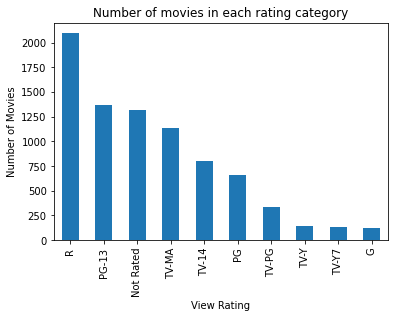

In [95]:
df['View Rating'].value_counts().head(10).plot(kind = 'bar')
plt.title('Number of movies in each rating category')
plt.ylabel('Number of Movies')
plt.xlabel('View Rating')
plt.show()

## 4. Top 10 movies based on awards received:

In [56]:
df[['Title','Awards Received']].sort_values(by='Awards Received', ascending = False).head(10)

,Title,Awards Received
1594,Parasite,300.0
6598,ROMA,251.0
9325,La La Land,242.0
13550,12 Years a Slave,242.0
11423,Mad Max: Fury Road,241.0
13333,Gravity,239.0
326,Sesame Street,232.0
9913,Moonlight,229.0
15119,The Lord of the Rings: The Return of the King,210.0
12229,Birdman or (The Unexpected Virtue of Ignorance),194.0


## 5. Number of days a movie takes to come on Netflix:

In [57]:
df1 = df.copy()
df1['Release Date'] = df['Release Date'].dropna()
df1['Netflix Release Date'] = df['Netflix Release Date'].dropna()

df1['Release Date'] = pd.to_datetime(df1['Release Date'])
df1['Netflix Release Date'] = pd.to_datetime(df1['Netflix Release Date'])

df1['Number of days'] = df1['Netflix Release Date'] - df1['Release Date']
med = df1['Number of days'].median()
print(f'It takes a median of {med} for a movie to come on Netflix')

It takes a median of 760 days 00:00:00 for a movie to come on Netflix


## 6. Number of movies in each language:

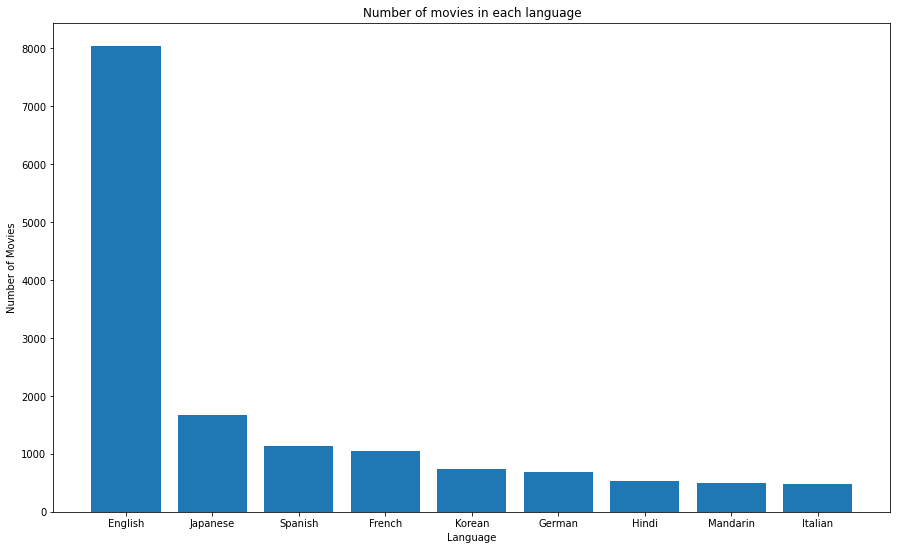

In [97]:
df['Languages'] = df['Languages'].fillna('empty')
lang = {}
for i in df['Languages']:
  j = i.split(', ')
  for v in j:
    if v not in lang:
      lang[v] = 1
    else:
      lang[v] += 1

k = dict(sorted(lang.items(),key=lambda x:x[1],reverse = True)[:10])
del k['empty']
keys = k.keys()
values = k.values()
plt.figure(figsize=(15,9))
plt.bar(keys, values)
plt.title('Number of movies in each language')
plt.ylabel('Number of Movies')
plt.xlabel('Language')
plt.show()

## 7. Number of movies in each runtime:

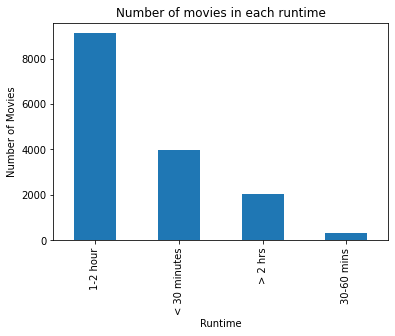

In [99]:
df['Runtime'].value_counts().plot(kind = 'bar')
plt.title('Number of movies in each runtime')
plt.ylabel('Number of Movies')
plt.xlabel('Runtime')
plt.show()

## 8. Movies with good IMDB rating (above 7) that's released after 2019:

In [77]:
import datetime
df['Release Date'] = pd.to_datetime(df['Release Date'])
df2 = df[df['Release Date'].dt.year>=2019]
df3 = df2[df2['IMDb Score']>7]
df3.head(5)

,Title,Genre,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,IMDb Votes,Overall Score
5,The Con-Heartist,"Comedy, Romance",Thai,Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Thodsapon Thiptinnak...","Thiti Mahayotaruk, Nadech Kugimiya, Kathaleeya...",NaN,7.4,NaN,NaN,NaN,NaN,NaN,2020-12-03,2021-03-03,NaN,131.0,NaN
15,Joker,"Crime, Drama, Thriller",English,Movie,3.5,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Todd Phillips,"Scott Silver, Jerry Robinson, Todd Phillips, B...","Joaquin Phoenix, Zazie Beetz, Robert De Niro, ...",R,8.4,68.0,59.0,112.0,228.0,"$335,451,311",2019-10-04,2021-03-03,"Bron Studios, Creative Wealth Media Finance, D...",951938.0,138.9
26,Brave New World,"Drama, Sci-Fi",English,Series,3.8,"Poland,Czech Republic,Hungary,Slovakia,Romania...",< 30 minutes,NaN,"David Wiener, Brian Taylor, Grant Morrison","Nina Sosanya, Harry Lloyd, Jessica Brown Findl...",TV-MA,7.1,NaN,NaN,NaN,NaN,NaN,2020-07-15,2021-03-02,NaN,9408.0,NaN
40,Restart After Come Back Home,"Drama, Romance",Japanese,Movie,8.6,Japan,1-2 hour,Ryûta Inoue,Kumiko Satô,"Masahiro Kômoto, Yukijirô Hotaru, Eri Murakawa...",NaN,7.2,NaN,NaN,NaN,NaN,NaN,2020-09-04,2021-03-01,NaN,80.0,NaN
45,Years and Years,"Drama, Sci-Fi",English,Series,4.2,Belgium,< 30 minutes,NaN,Russell T. Davies,"Anne Reid, T'Nia Miller, Rory Kinnear, Ruth Ma...",TV-MA,8.3,NaN,NaN,1.0,14.0,NaN,2019-06-24,2021-03-01,NaN,22324.0,NaN


## 9. Number of movies in each genre:

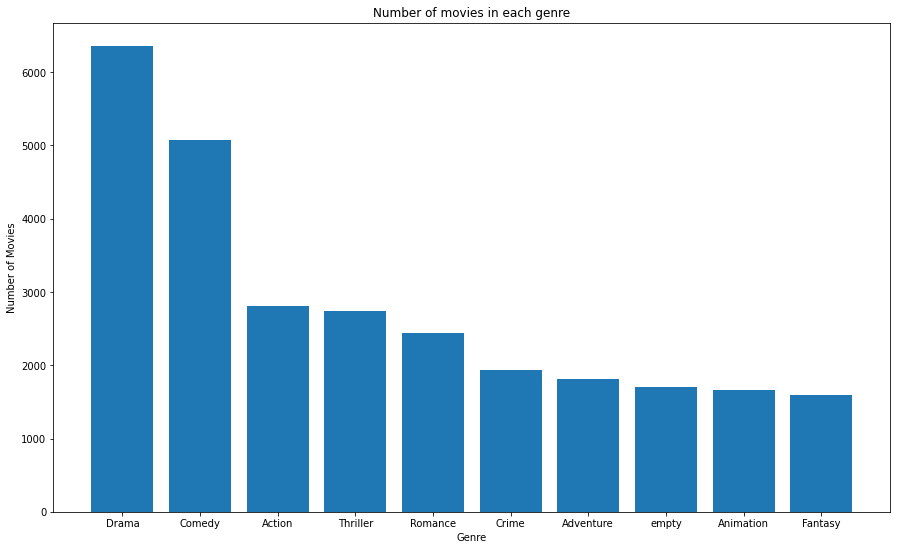

In [100]:
df['Genre'] = df['Genre'].fillna('empty')
genre = {}
for i in df['Genre']:
  j = i.split(', ')
  for v in j:
    if v not in genre:
      genre[v] = 1
    else:
      genre[v] += 1

k = dict(sorted(genre.items(),key=lambda x:x[1],reverse = True)[:10])
keys = k.keys()
values = k.values()
plt.figure(figsize=(15,9))
plt.bar(keys, values)
plt.title('Number of movies in each genre')
plt.ylabel('Number of Movies')
plt.xlabel('Genre')
plt.show()

## 10. Correlation between each rating:

In [107]:
corr = df[['IMDb Score','Metacritic Score','Rotten Tomatoes Score','Hidden Gem Score']].corr()

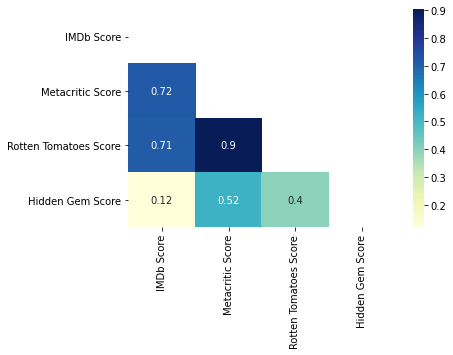

In [108]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df[['IMDb Score','Metacritic Score','Rotten Tomatoes Score','Hidden Gem Score']].corr(),annot=True,cmap="YlGnBu",mask=mask)

## 11. Popularity of movies based on votes:

In [85]:
df[['Title','IMDb Votes']].sort_values(by='IMDb Votes',ascending=False).head(10)

,Title,IMDb Votes
14621,The Shawshank Redemption,2354197.0
14478,The Dark Knight,2308981.0
14331,Inception,2072912.0
15093,Pulp Fiction,1831004.0
864,Fiction.,1831004.0
14685,Forrest Gump,1814709.0
14290,The Matrix,1684368.0
14367,The Lord of the Rings: The Fellowship of the Ring,1664865.0
15119,The Lord of the Rings: The Return of the King,1645871.0
14696,The Godfather,1625286.0
